In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
train_variants=pd.read_csv("training_variants")
test_variants=pd.read_csv("test_variants")
train_text=pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
test_text=pd.read_csv("test_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)


In [42]:
train = pd.merge(train_variants, train_text, on='ID')
print train.head()

   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  
2   Abstract Background  Non-small cell lung canc...  
3  Recent evidence has demonstrated that acquired...  
4  Oncogenic mutations in the monomeric Casitas B...  


In [43]:
test = pd.merge(test_variants, test_text, on='ID')
print test.head()

   ID     Gene Variation                                               TEXT
0   0    ACSL4     R570S  2. This mutation resulted in a myeloproliferat...
1   1    NAGLU     P521L   Abstract The Large Tumor Suppressor 1 (LATS1)...
2   2      PAH     L333F  Vascular endothelial growth factor receptor (V...
3   3     ING1     A148D  Inflammatory myofibroblastic tumor (IMT) is a ...
4   4  TMEM216      G77A   Abstract Retinoblastoma is a pediatric retina...


In [44]:
# we add a new column in the dataframe called 'LenText' which contains the length of each text field
train.loc[:,'LenText'] =(train['TEXT'].str.len()).astype(int)
print train.head()

   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  LenText  
0  Cyclin-dependent kinases (CDKs) regulate a var...    39765  
1   Abstract Background  Non-small cell lung canc...    36831  
2   Abstract Background  Non-small cell lung canc...    36831  
3  Recent evidence has demonstrated that acquired...    36308  
4  Oncogenic mutations in the monomeric Casitas B...    41427  


In [45]:
# we add a new column in the dataframe called 'LenText' which contains the length of each text field
test.loc[:,'LenText'] =(test['TEXT'].str.len()).astype(int)
print test.head()

   ID     Gene Variation                                               TEXT  \
0   0    ACSL4     R570S  2. This mutation resulted in a myeloproliferat...   
1   1    NAGLU     P521L   Abstract The Large Tumor Suppressor 1 (LATS1)...   
2   2      PAH     L333F  Vascular endothelial growth factor receptor (V...   
3   3     ING1     A148D  Inflammatory myofibroblastic tumor (IMT) is a ...   
4   4  TMEM216      G77A   Abstract Retinoblastoma is a pediatric retina...   

   LenText  
0    49925  
1    31460  
2    75419  
3    54100  
4    77127  


In [46]:
# creating a new column called Text Count
train.loc[:, 'Text_count']  = train["TEXT"].apply(lambda x: len(x.split()))
train.head()


,ID,Gene,Variation,Class,TEXT,LenText,Text_count
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,39765,6089
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,36831,5722
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,36831,5722
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,36308,5572
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,41427,6202


In [47]:
# creating a new column called Text Count
test.loc[:, 'Text_count']  = test["TEXT"].apply(lambda x: len(x.split()))
test.head()

,ID,Gene,Variation,TEXT,LenText,Text_count
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,49925,7417
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,31460,4706
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,75419,11080
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,54100,8376
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,77127,11159


In [48]:
print train[Class].count

NameError: name 'Class' is not defined

 ## Unique Variations

In [49]:
unique_variation= set(train.Variation)
print unique_variation

set(['Y62C', 'D399N', 'L858M', 'Q531*', 'E1586G', 'SRGAP3-RAF1 Fusion', 'H93Q', 'H93R', 'V564I', 'H93D', 'L1195V', 'K4E', 'T1623I', 'E203K', 'E2856A', 'P380R', 'R2505*', 'S786F', 'Y1463S', 'N581Y', 'G464E', 'S32I', 'N581S', 'MAGI3-AKT3 Fusion', 'A502_Y503dup', 'H697Y', 'Y53H', 'L2396F', 'R2450*', 'Y24C', 'N581D', 'S270L', 'D289del', 'V1188L', 'W557_K558del', 'L191H', 'H118P', 'EP300-MOZ Fusion', 'D603N', 'G480W', 'D289_D292del', 'L1122V', 'D351H', 'D603G', 'F460L', 'G17V', 'S860L', 'P86H', 'G1738R', 'C450_K451insMIEWMI', 'V411L', 'T1324N', 'G17A', 'V555_V559del', 'G776S', 'GPIAP1-PDGFRB Fusion', 'E598_Y599insGLVQVTGSSDNEYFYVDFREYE', 'D171G', 'P124Q', 'G165V', 'P124S', 'G829R', 'G165R', 'R496C', 'D835del', 'P95S', 'K558_E562del', 'R496H', 'R383*', 'G165E', 'R970C', 'P153H', 'D808N', 'G1743R', 'V118D', 'TRA-NKX2-1 Fusion', 'P106L', 'S562L', 'M504V', 'L387M', 'D600_L601insFREYEYD', 'M1008I', 'C630Y', 'Y801H', 'E719G', 'E719K', 'R283Q', 'K509I', 'I391M', 'Q227L', 'A750_E758delinsP', 'T599_

# Unique Genes

In [50]:
unique_genes=set(train.Gene)
print unique_genes
print len(unique_genes)

set(['ERRFI1', 'CCNE1', 'STK11', 'MEN1', 'FAM58A', 'AKT1', 'AKT2', 'AKT3', 'ARAF', 'RB1', 'IKBKE', 'NKX2-1', 'ROS1', 'AXL', 'RARA', 'RAD51D', 'BRCA1', 'PIK3CA', 'PIK3CB', 'MAP3K1', 'EIF1AX', 'INPP4B', 'WHSC1L1', 'GATA3', 'FGFR2', 'GLI1', 'CDH1', 'PPP6C', 'MYC', 'YAP1', 'BTK', 'NF2', 'CDKN2B', 'ERBB3', 'IGF1R', 'CDKN2A', 'PIK3R1', 'ERBB4', 'BARD1', 'IDH2', 'IDH1', 'NUP93', 'RET', 'BRD4', 'PMS1', 'MDM2', 'SETD2', 'MDM4', 'FGFR3', 'RAF1', 'FGFR1', 'MYD88', 'CCND1', 'ARID1B', 'ARID1A', 'CCND2', 'B2M', 'TCF7L2', 'KIT', 'FOXA1', 'PTEN', 'FAT1', 'RUNX1', 'WHSC1', 'APC', 'CCND3', 'CTCF', 'KDM5C', 'IL7R', 'DNMT3B', 'BRCA2', 'FOXP1', 'SDHC', 'CDKN1B', 'CDKN1A', 'RRAS2', 'CARM1', 'RIT1', 'PTPN11', 'RICTOR', 'KDM5A', 'XPO1', 'MYCN', 'PPM1D', 'SRSF2', 'ASXL1', 'TSC2', 'RASA1', 'ASXL2', 'JUN', 'PIK3R3', 'PIK3R2', 'H3F3A', 'JAK1', 'MSH2', 'FLT1', 'CHEK2', 'CARD11', 'CTLA4', 'TCF3', 'STAG2', 'ARID2', 'PBRM1', 'RNF43', 'VEGFA', 'HRAS', 'RHOA', 'FGF4', 'FGF3', 'PAX8', 'KEAP1', 'ETV1', 'EPAS1', 'MGA', 'T

In [51]:
# assigning unique numbers for each unique genes
number_gene={}
ctr=1
for i in set(unique_genes):
    number_gene[ctr]=i
    ctr=ctr+1

In [52]:
# assigning unique numbers for each unique variation
number_variation={}
ctr=1
for i in set(unique_variation):
    number_variation[ctr]=i
    ctr=ctr+1


In [53]:
# creating a new dataframe with the numerical values
import pandas as pd
dfnum_traino=train.copy(deep=True)
#for gene

for index, row in dfnum_traino.iterrows():
    for j in dict(number_gene):
        if(row['Gene']==number_gene[j]):
            dfnum_traino.loc[index,'Gene']=j

In [54]:
#for variation   

for index, row in dfnum_traino.iterrows():
    for j in dict(number_variation):
        if(row['Variation']==number_variation[j]):
            dfnum_traino.loc[index,'Variation']=j                
print dfnum_traino

        ID Gene Variation  Class  \
0        0  121      2500      1   
1        1   60       913      2   
2        2   60      2069      2   
3        3   60      2311      3   
4        4   60      1164      4   
5        5   60       651      4   
6        6   60       756      5   
7        7   60      2517      1   
8        8   60      1362      4   
9        9   60       117      4   
10      10   60      1312      4   
11      11   60      2422      4   
12      12   60      1542      4   
13      13   60       116      4   
14      14   60      1579      5   
15      15   60      1481      4   
16      16   60      2500      1   
17      17   60       549      4   
18      18   60      2473      5   
19      19   60      1366      4   
20      20   60      1453      6   
21      21   60      1541      4   
22      22   60      1999      4   
23      23   60       739      4   
24      24   60      2091      4   
25      25   60      1569      4   
26      26  216      1699   

In [55]:
# creating a new column called Text Count
dfnum_traino.loc[:, 'Text_count']  = dfnum_traino["TEXT"].apply(lambda x: len(x.split()))
# we add a new column in the dataframe called 'LenText' which contains the length of each text field
dfnum_traino.loc[:,'LenText'] =(dfnum_traino['TEXT'].str.len()).astype(int)
print dfnum_traino.head()

   ID Gene Variation  Class  \
0   0  121      2500      1   
1   1   60       913      2   
2   2   60      2069      2   
3   3   60      2311      3   
4   4   60      1164      4   

                                                TEXT  LenText  Text_count  
0  Cyclin-dependent kinases (CDKs) regulate a var...    39765        6089  
1   Abstract Background  Non-small cell lung canc...    36831        5722  
2   Abstract Background  Non-small cell lung canc...    36831        5722  
3  Recent evidence has demonstrated that acquired...    36308        5572  
4  Oncogenic mutations in the monomeric Casitas B...    41427        6202  


# Test And Train Split

In [56]:
#copying dataframe in another variable and removing unimportant features
data=dfnum_traino.copy()
data.head()

,ID,Gene,Variation,Class,TEXT,LenText,Text_count
0,0,121,2500,1,Cyclin-dependent kinases (CDKs) regulate a var...,39765,6089
1,1,60,913,2,Abstract Background Non-small cell lung canc...,36831,5722
2,2,60,2069,2,Abstract Background Non-small cell lung canc...,36831,5722
3,3,60,2311,3,Recent evidence has demonstrated that acquired...,36308,5572
4,4,60,1164,4,Oncogenic mutations in the monomeric Casitas B...,41427,6202


In [57]:
import math
class1_data=data[data.Class==1]
totalsize=len(class1_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=class1_data.head(train_size)
test_data=class1_data.tail(totalsize-train_size)
print len(test_data)

170


In [58]:
class2_data=data[data.Class==2]
totalsize=len(class2_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class2_data.head(train_size))
test_data=test_data.append(class2_data.tail(totalsize-train_size))
print test_data.Class.value_counts()

1    170
2    135
Name: Class, dtype: int64


In [59]:
class3_data=data[data.Class==3]
totalsize=len(class3_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class3_data.head(train_size))
test_data=test_data.append(class3_data.tail(totalsize-train_size))
print len(test_data)

331


In [60]:
class4_data=data[data.Class==4]
totalsize=len(class4_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class4_data.head(train_size))
test_data=test_data.append(class4_data.tail(totalsize-train_size))
print test_data.Class.value_counts()

4    205
1    170
2    135
3     26
Name: Class, dtype: int64


In [61]:
class5_data=data[data.Class==5]
totalsize=len(class5_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class5_data.head(train_size))
test_data=test_data.append(class5_data.tail(totalsize-train_size))
print len(test_data)

608


In [62]:
class6_data=data[data.Class==6]
totalsize=len(class6_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class6_data.head(train_size))
test_data=test_data.append(class6_data.tail(totalsize-train_size))
print len(test_data)

690


In [63]:
class7_data=data[data.Class==7]
totalsize=len(class7_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class7_data.head(train_size))
test_data=test_data.append(class7_data.tail(totalsize-train_size))
print len(test_data)

975


In [64]:
class8_data=data[data.Class==8]
totalsize=len(class8_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=train_data.append(class8_data.head(train_size))
test_data=test_data.append(class8_data.tail(totalsize-train_size))

In [65]:
class9_data=data[data.Class==9]
totalsize=len(class9_data)
train_size=int(math.ceil(0.7*totalsize))
train_data=(train_data.append(class9_data.head(train_size)))
test_data=test_data.append(class9_data.tail(totalsize-train_size))
print len(test_data)

991


In [66]:
len (train_data)

2330

In [67]:
len(test_data)

991

In [68]:
test_data.head()

,ID,Gene,Variation,Class,TEXT,LenText,Text_count
2073,2073,206,940,1,TET proteins oxidize 5-methylcytosine (5mC) on...,46418,7123
2074,2074,206,1507,1,TET proteins oxidize 5-methylcytosine (5mC) on...,46418,7123
2080,2080,206,2040,1,TET proteins oxidize 5-methylcytosine (5mC) on...,46418,7123
2085,2085,183,566,1,Argonaute (Ago) proteins mediate silencing of ...,31087,4755
2086,2086,183,2540,1,Argonaute (Ago) proteins mediate silencing of ...,31087,4755


## Decision tree classifier on Gene And Variation Features

In [69]:
train_data_DecisionTree=train_data.copy()
train_target=train_data_DecisionTree.Class
test_data_DecisionTree=test_data.copy()
test_target=test_data.Class

In [70]:
del train_data_DecisionTree['ID']
del train_data_DecisionTree['TEXT']
del train_data_DecisionTree['Class']
del train_data_DecisionTree['LenText']
del train_data_DecisionTree['Text_count']
del test_data_DecisionTree['ID']
del test_data_DecisionTree['TEXT']
del test_data_DecisionTree['Class']
del test_data_DecisionTree['LenText']
del test_data_DecisionTree['Text_count']

In [71]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=6)
clf.fit(train_data_DecisionTree,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [72]:
len(test_data_DecisionTree)

991

In [73]:
predicted=clf.predict(test_data_DecisionTree)
len(predicted)

991

In [74]:
from sklearn import metrics
metrics.accuracy_score(test_target,predicted)

0.37840565085771949

In [75]:
decisionTree_confusionmatrix= metrics.confusion_matrix(test_target,predicted)
print metrics.classification_report(test_target,predicted)

             precision    recall  f1-score   support

          1       0.49      0.22      0.30       170
          2       0.00      0.00      0.00       135
          3       0.00      0.00      0.00        26
          4       0.33      0.59      0.42       205
          5       0.19      0.44      0.26        72
          6       0.47      0.79      0.59        82
          7       0.52      0.42      0.47       285
          8       0.00      0.00      0.00         5
          9       0.00      0.00      0.00        11

avg / total       0.35      0.38      0.34       991



C:\Users\Ashu\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


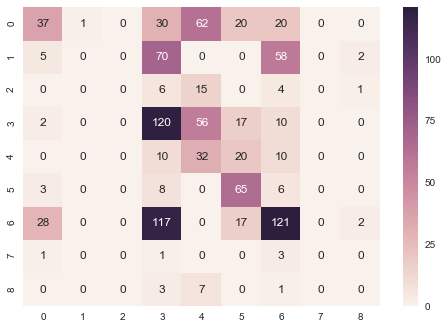

In [76]:
sns.heatmap(decisionTree_confusionmatrix,annot=True,fmt='d')
plt.show()

Here we could easily observe that most of the results we are getting are incorrect so now we will try to do work
on Text and implement some models

## Logistic Regression On Text Data Only


In [77]:
train_data_LogisticRegression=train_data.copy()
test_data_LogisticRegression=test_data.copy()

In [78]:
del train_data_LogisticRegression['ID']
del train_data_LogisticRegression['Gene']
del train_data_LogisticRegression['Variation']
del train_data_LogisticRegression['LenText']
del train_data_LogisticRegression['Text_count']
del test_data_LogisticRegression['ID']
del test_data_LogisticRegression['Gene']
del test_data_LogisticRegression['Variation']
del test_data_LogisticRegression['LenText']
del test_data_LogisticRegression['Text_count']

In [79]:
train_text_LogisticRegression=train_data_LogisticRegression.TEXT.tolist()
test_text_LogisticRegression=test_data_LogisticRegression.TEXT.tolist()

### Preprocessing on Text Data

In [80]:
def removeSpecialCharcters(data):
    for i in range (len(data)):
        for k in data[i].split("\n"):
            data[i]=re.sub(r"[^a-zA-Z0-9]+", ' ', k)
def removeStopWords(data):
    stop=set(stopwords.words("english"))
    stop.update((u'fig','1','figure'))
    stop.update(str(i) for i in range(2,100))
    for i in range(len(data)):
        words=[]
        for k in data[i].split(" "):
            words.append(k)
        s=""
        for w in words:
            if (w.lower()) not in stop:
                s=s+" "+w
        data[i]=s

In [81]:
removeSpecialCharcters(train_text_LogisticRegression)
removeSpecialCharcters(test_text_LogisticRegression)

In [82]:
removeStopWords(train_text_LogisticRegression)
removeStopWords(test_text_LogisticRegression)

In [83]:
print train_text_LogisticRegression[:1]

[' Cyclin dependent kinases CDKs regulate variety fundamental cellular processes CDK10 stands one last orphan CDKs activating cyclin identified kinase activity revealed Previous work shown CDK10 silencing increases ETS2 v ets erythroblastosis virus E26 oncogene homolog driven activation MAPK pathway confers tamoxifen resistance breast cancer cells precise mechanisms CDK10 modulates ETS2 activity generally functions CDK10 remain elusive demonstrate CDK10 cyclin dependent kinase identifying cyclin activating cyclin Cyclin orphan cyclin product FAM58A whose mutations cause STAR syndrome human developmental anomaly whose features include toe syndactyly telecanthus anogenital renal malformations show STAR syndrome associated cyclin mutants unable interact CDK10 Cyclin silencing phenocopies CDK10 silencing increasing c Raf conferring tamoxifen resistance breast cancer cells CDK10 cyclin phosphorylates ETS2 vitro cells positively controls ETS2 degradation proteasome ETS2 protein levels increa

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
train_data_features = vectorizer.fit_transform(train_text_LogisticRegression)
train_data_features

<2330x122736 sparse matrix of type '<type 'numpy.int64'>'
	with 3532005 stored elements in Compressed Sparse Row format>

In [85]:
test_data_features=vectorizer.transform(test_text_LogisticRegression)

In [86]:

from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression(penalty='l1',class_weight='balanced')
lr_clf.fit(train_data_features,train_data_LogisticRegression.Class)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [87]:

target_predicted_Log_Reg=lr_clf.predict(test_data_features)

In [88]:

print metrics.accuracy_score(test_data_LogisticRegression.Class,target_predicted_Log_Reg)

0.3824419778


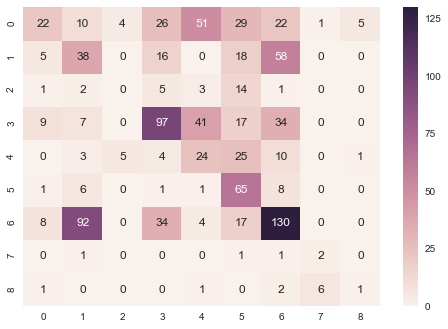

In [89]:
logistic_l1_confusionmatrix= metrics.confusion_matrix(test_data_LogisticRegression.Class,target_predicted_Log_Reg)
sns.heatmap(logistic_l1_confusionmatrix,annot=True,fmt='d')
plt.show()

## Applying Multinomial Naive Baye's On Text

In [90]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_data_features,train_data.Class)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
target_predicted_NaiveBayes=nb.predict(test_data_features)

In [92]:
metrics.accuracy_score(test_data.Class,target_predicted_NaiveBayes)

0.41170534813319881

In [93]:
naiveBayes_confusionmatrix=metrics.confusion_matrix(test_data.Class,target_predicted_NaiveBayes)

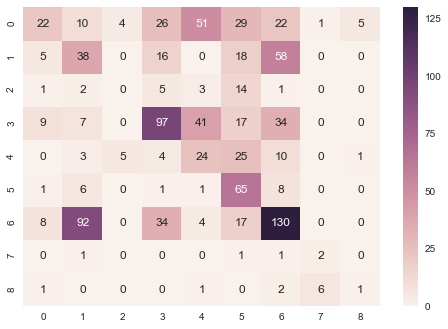

In [94]:
sns.heatmap(logistic_l1_confusionmatrix,annot=True,fmt='d')
plt.show()

## Linear Svc on Text Data

In [95]:
from sklearn.svm import LinearSVC
svc_Linear=LinearSVC(class_weight='balanced')
svc_Linear.fit(train_data_features,train_data.Class)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [96]:
predicted_svc_Linear=svc_Linear.predict(test_data_features)

In [97]:
metrics.accuracy_score(test_data.Class,predicted_svc_Linear)

0.38647830474268413

In [98]:
confusionmatrix_svc_Linear=metrics.confusion_matrix(test_data.Class,predicted_svc_Linear)


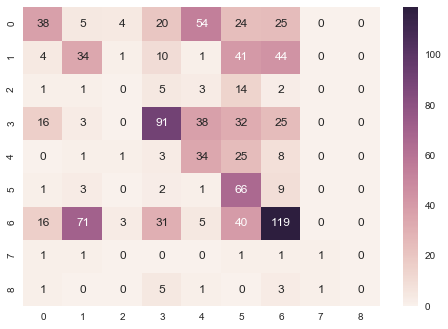

In [99]:
plt.figure()
sns.heatmap(confusionmatrix_svc_Linear,annot=True,fmt='d')
plt.show()

## Applying RBF SVM

In [100]:
from sklearn.svm import SVC
svc_RBF=SVC(C=10000.0,class_weight='balanced')
svc_RBF.fit(train_data_features,train_data.Class)

SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
predicted_svc_RBF=svc_RBF.predict(test_data_features)
metrics.accuracy_score(test_data.Class,predicted_svc_RBF)

0.42785065590312815

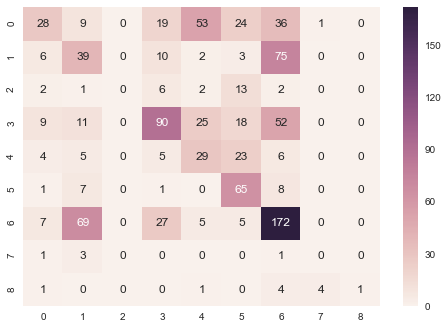

In [102]:
confusionmatrix_svc_RBF=metrics.confusion_matrix(test_data.Class,predicted_svc_RBF)
plt.figure()
sns.heatmap(confusionmatrix_svc_RBF,annot=True,fmt='d')
plt.show()

# # Applying Decision Tree On Text

In [103]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=6)
clf.fit(train_data_features,train_data.Class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [104]:
predicted_DecisionTree=clf.predict(test_data_features)

In [105]:
metrics.accuracy_score(test_data.Class,predicted_DecisionTree)

0.4238143289606458

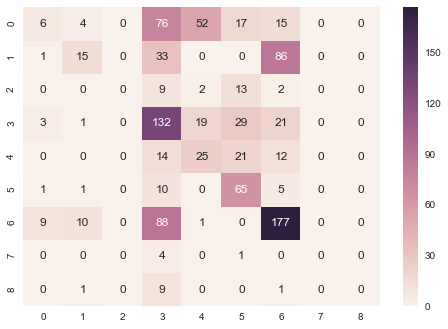

In [106]:
confusionmatrix_DecisionTree=metrics.confusion_matrix(test_data.Class,predicted_DecisionTree)
plt.figure()
sns.heatmap(confusionmatrix_DecisionTree,annot=True,fmt='d')
plt.show()

## Applying tfidf + Count Vectorizer + Linear SVC

In [107]:
X_train = train_data['TEXT'].values
X_test = test_data['TEXT'].values
y_train = train_data['Class'].values
y_test = test_data['Class'].values



In [108]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm


In [109]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
])
text_clf = text_clf.fit(X_train,y_train)

In [110]:
y_test_predicted = text_clf.predict(X_test)
metrics.accuracy_score(y_test,y_test_predicted)




0.43491422805247226

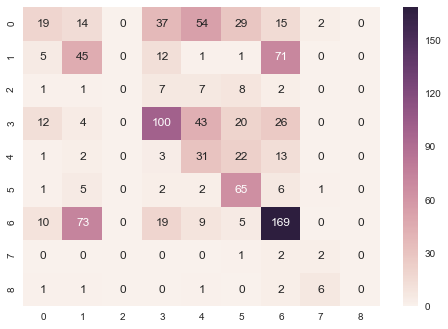

In [111]:
confusionmatrix_Linear_svc_Tfidf=metrics.confusion_matrix(y_test,y_test_predicted)
plt.figure()
sns.heatmap(confusionmatrix_Linear_svc_Tfidf,annot=True,fmt='d')
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsClassifier
clf_kNearest= KNeighborsClassifier(n_neighbors=9,weights='distance',p=2)
clf_kNearest.fit(train_data_features,train_data.Class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [113]:
predict_clf_kNearest=clf_kNearest.predict(test_data_features)

In [114]:
metrics.accuracy_score(test_data.Class,predict_clf_kNearest)

0.33299697275479312

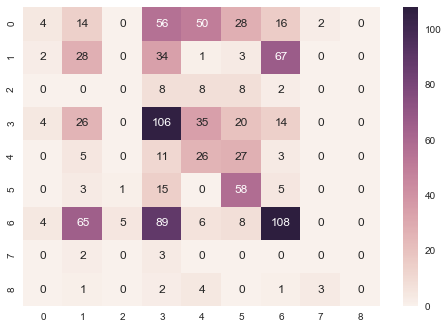

In [115]:

confusionmatrix_KNearest=metrics.confusion_matrix(test_data.Class,predict_clf_kNearest)
plt.figure()
sns.heatmap(confusionmatrix_KNearest,annot=True,fmt='d')
plt.show()

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2)) 
train_data_features = vectorizer.fit_transform(train_text_LogisticRegression)
train_data_features

<2330x2109893 sparse matrix of type '<type 'numpy.int64'>'
	with 10056910 stored elements in Compressed Sparse Row format>

In [117]:
test_data_features=vectorizer.transform(test_text_LogisticRegression)

In [118]:

from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression(penalty='l1',class_weight='balanced')
lr_clf.fit(train_data_features,train_data_LogisticRegression.Class)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [119]:

target_predicted_Log_Reg=lr_clf.predict(test_data_features)
print metrics.accuracy_score(test_data_LogisticRegression.Class,target_predicted_Log_Reg)

0.404641775984
